# MIS 6900 - HW2 - Excel type things with Python

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

Import the `whatif` module

In [4]:
from whatif import Model
from whatif import get_sim_results_df

## Analysis 1 - Basic Break-even Analysis

Problem description:

The owner of a relatively small business is trying to determine the breakeven level of sales of the company's single product. The fixed cost of manufacturing product each month is **\\$5,000**. The variable cost of producing this product is **\\$100** per unit. The current selling price is **\\$115**. Using historical data on selling price and monthly demand, the owner fit the folllowing function relating to demand and selling price:

$D = 0.06S^2 - 35S + 4900$

where *D* is the monthly demand for the product and *S* is the selling price. This is a 2nd order polynomial function. Let's call this equation the `Selling Price Function` (or `SPF`, for short).

### Base Model

In [72]:
class SingleProductSPF(Model):
    """Base model"""
    def __init__(self, fixed_cost = 5000, var_cost = 100, selling_price = 115, 
                 spf_constant = 4900, spf_linear = 35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    def demand(self):
        demand = (self.spf_quadratic * (self.selling_price ** 2)) - (self.spf_linear * self.selling_price) + (self.spf_constant)
        return demand
    
    def profit(self):
        profit = (self.demand() * self.selling_price) - ((self.demand() * self.var_cost) + self.fixed_cost)
        return profit
    
    def breakeven_selling_price(self):
        breakeven_selling_price = self.goal_seek(obj_fn = 'profit', target = 0, by_changing = 'selling_price', a = 0, b = 2000, N = 100) 
        return breakeven_selling_price
    

Instantiating an instance of our SPF model and confirming that we're getting the correct demand and profit value with default parameters

In [73]:
model = SingleProductSPF(selling_price=102.58)
print(f"Single product SPF model demand with selling price set at ${model.selling_price:,.2f} is: ${model.demand():,.2f}")
print(f"Single product SPF model profit with selling price set at ${model.selling_price:,.2f} is: ${model.profit():,.2f}")
print(f"Single product SPF model break-even selling price is: ${model.breakeven_selling_price():,.2f}")
print(f"Single product SPF model attributes: {model}")

Single product SPF model demand with selling price set at $102.58 is: $1,941.06
Single product SPF model profit with selling price set at $102.58 is: $7.93
Single product SPF model break-even selling price is: $352.76
Single product SPF model attributes: {'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 102.58, 'spf_constant': 4900, 'spf_linear': 35, 'spf_quadratic': 0.06}


### 1-Way Data Table

Creating a one-way data table using the inherited `data_table` function from Model (from the `whatif` package). We are using `selling_price` values from 80 to 140 (by steps of 10) as the input and outputting the `profit` and `demand`.

In [105]:
one_way_inputs = {'selling_price': np.arange(80, 141, 10)}
one_way_output = ['profit', 'demand']

one_way_df = model.data_table(one_way_inputs, one_way_output)
one_way_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


Graphing our 1-way data table dataframe.

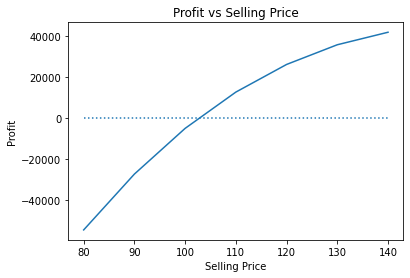

In [120]:
one_way_x = one_way_df['selling_price']
one_way_y = one_way_df['profit']

plt.xlabel('Selling Price')
plt.ylabel('Profit')

plt.hlines(y=0, xmin=min(one_way_df['selling_price']), xmax=max(one_way_df['selling_price']), linestyles='dotted')

plt.title('Profit vs Selling Price')

plt.plot(one_way_x, one_way_y)

plt.show()

The shape of the relationship between the selling price and profit looks like some degree polynomial. Profit does not increase linearly with selling price. We can see that as selling price increases, profit increases but at a decreasing rate. 

The result is that the "line" is curved, arching as selling price increases. It almost looks like 40%-45% of the left side of a rainbow.

In short, the relationship is nonlinear and this makes sense since our SPF (selling price function) is quadratic. Our SPF calculates the demand and demand is in turn used to calculate the profit. Not only is SPF quadratic, but it has a positive squared variable (0.06 * S ^ 2) and a negative linear variable (- 35 * S).

### 2-Way Data Table

### Digging Deeper

### Simulation

## Analysis 2 - Wrangling csv files

### Consolidation

### Summarization